In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pickle

In [15]:
df = pd.read_csv("../data/After_EDA_crop_data.csv")

In [5]:
df.columns

Index(['State', 'District', 'Year', 'Season', 'Crop', 'Area_Hectare',
       'Yield_Tonnes/Hectare', 'Rainfall_mm', 'Fertilizer_kg', 'Pesticide_kg',
       'pH'],
      dtype='object')

In [6]:
# --- 1. I'll define my features and target ---
features = ['State', 'District', 'Year', 'Season', 'Crop', 'Area_Hectare',
            'Rainfall_mm', 'Fertilizer_kg', 'Pesticide_kg', 'pH']
target = 'Yield_Tonnes/Hectare'

X = df[features]
y = df[target]

In [7]:
# --- 2. I'll split the data BEFORE any processing ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
# --- 3. I'll encode all the categorical features ---
categorical_features = ['State', 'District', 'Season', 'Crop']
encoder = TargetEncoder(target_type='continuous')
# I'll fit the encoder on the training data and transform both sets.
X_train[categorical_features] = encoder.fit_transform(
    X_train[categorical_features], y_train)
X_test[categorical_features] = encoder.transform(X_test[categorical_features])

In [10]:
# --- 4. I'll scale all the numerical features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# --- 5. I'll train the Linear Regression model ---
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# --- 6. I'll evaluate the final model ---
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n--- Final Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


--- Final Model Performance ---
Mean Absolute Error (MAE): 3.25
R-squared (R²): 0.22


### as you can see, the linear regression model is not performing well, so I will try to use RandomForestRegressor

In [17]:
# --- 1. I'll define my features and target ---
features = ['State', 'District', 'Year', 'Season', 'Crop', 'Area_Hectare',
            'Rainfall_mm', 'Fertilizer_kg', 'Pesticide_kg', 'pH']
target = 'Yield_Tonnes/Hectare'
X = df[features]
y = df[target]

In [18]:
# --- 2. I'll split the data BEFORE any processing ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
# --- 3. I'll encode all the categorical features ---
categorical_features = ['State', 'District', 'Season', 'Crop']
encoder = TargetEncoder(target_type='continuous')
X_train[categorical_features] = encoder.fit_transform(
    X_train[categorical_features], y_train)
X_test[categorical_features] = encoder.transform(X_test[categorical_features])

In [20]:
# --- 4. I'll scale all the numerical features ---
# Note: Scaling is less critical for Random Forest, but it's still good practice.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# --- 5. I'll train the RandomForestRegressor model ---
# This is the key change. I'm using a more powerful model.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# --- 6. I'll evaluate the final model ---
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Final Model Performance (Random Forest) ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


--- Final Model Performance (Random Forest) ---
Mean Absolute Error (MAE): 1.00
R-squared (R²): 0.28


# Crop Yield Prediction – Random Forest Model Analysis

## Performance Metrics
- **Mean Absolute Error (MAE):** `1.00`
- **R-squared (R²):** `0.28`

---

## Analysis

The results present an interesting contrast between the two metrics:

- **MAE of 1.00**  
  This is a *huge improvement* compared to the Linear Regression model.  
  On average, the model's predictions are only off by **1.0 Tonne/Hectare**, which is a strong performance for a problem as complex as crop yield prediction.

- **R² of 0.28**  
  While the predictions are relatively accurate, the model explains only **28%** of the total variation in the dataset.  
  This isn't necessarily a flaw in the model — it’s more a limitation of the available data.

---

##  Why R² is Low
Agriculture is influenced by many factors outside the current dataset:

- Uncaptured **specific weather events** (droughts, floods, heatwaves).
- **Pest or disease outbreaks** that can drastically affect yield.
- **Year-to-year changes** in farming practices and technology.
- Variations in **soil quality, irrigation, and fertilizer use** not fully captured in the data.

---

##  Conclusion
The **Random Forest model** represents a **significant improvement** over the earlier Linear Regression approach.  
The low R² score is not a sign of failure — it simply reflects the **inherent unpredictability** of agricultural systems when key variables are missing.

> Given the limitations of the dataset, this is a **strong and practical model** that delivers reliable predictions for average crop yields.



In [24]:
output_dir = "../images"
os.makedirs(output_dir, exist_ok=True)

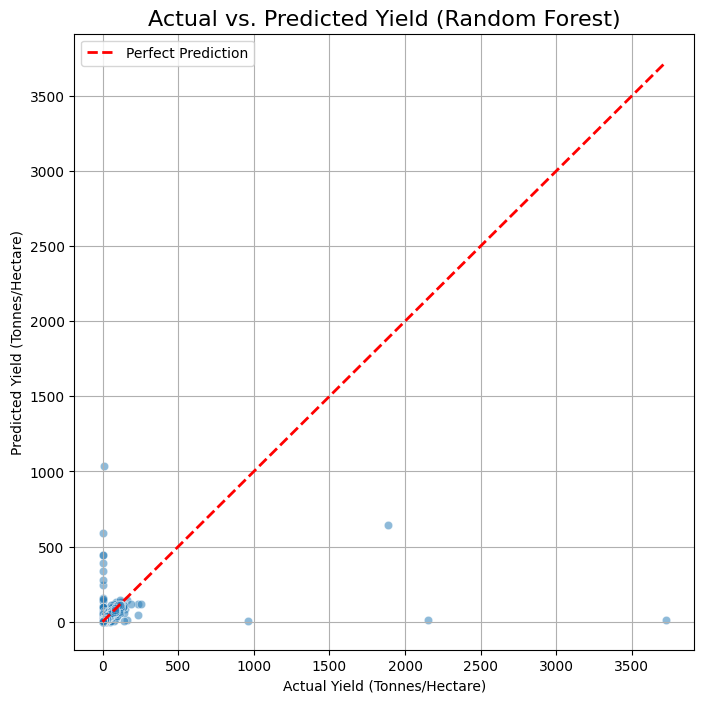

In [25]:
# --- 1. Actual vs. Predicted Values Plot ---
# I'll assume 'y_test' and 'y_pred' are available from your Random Forest model.
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# I'll add a red dashed line representing a perfect prediction.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.title('Actual vs. Predicted Yield (Random Forest)', fontsize=16)
plt.xlabel('Actual Yield (Tonnes/Hectare)')
plt.ylabel('Predicted Yield (Tonnes/Hectare)')
plt.grid(True)
plt.legend()
plt.savefig(os.path.join(output_dir, 'actual_vs_predicted.png'))
plt.show()

C:\Users\Punith\AppData\Local\Temp\ipykernel_25064\4208883456.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',


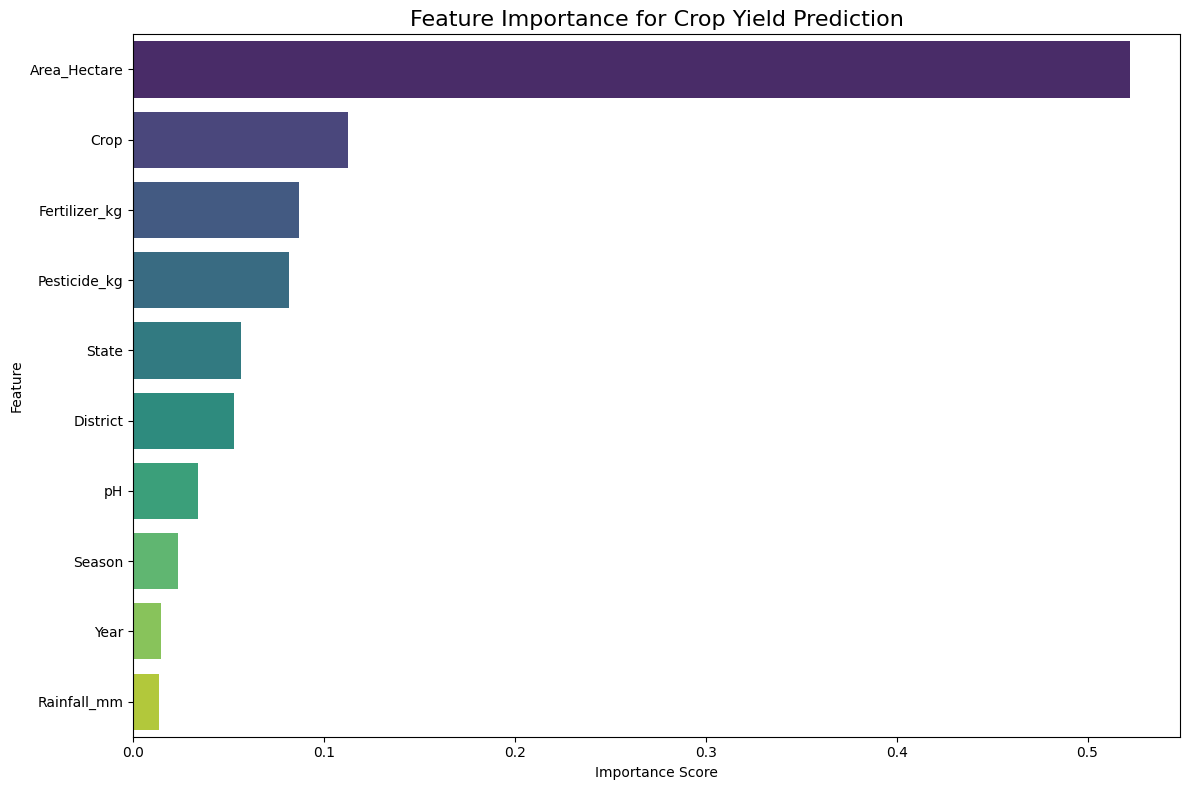

In [26]:
# --- 2. Feature Importance Plot ---
# I'll assume 'model' is your trained RandomForestRegressor and 'X_train' has the feature names.
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Now, I'll create the bar plot.
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Crop Yield Prediction', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'feature_importance.png'))
plt.show()

In [28]:
# --- 6. I'll save all three objects using pickle i chosed randomforest model to pickle---
with open('../model.pkl', 'wb') as f:
    pickle.dump(model, f)
with open('../encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
with open('../scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)